# Final Project Python Results S01B-01
## Teammates: Kai Yang(Ben), Jiaheng Shao(Steve), Qianqian Xiao, Xiaoqi Zhong(Elly)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import numpy.ma as ma
import datetime as dt 
import pingouin

In [3]:
data_1 = pd.read_excel("Regression 1.xlsx")
data_2 = pd.read_excel("Regression 2.xlsx")
data_3_1 = pd.read_excel("Regression 3-1.xlsx")
data_3_2 = pd.read_excel("Regression 3-2.xlsx")


/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
#Test 1
## Processing the data
factors1 = ["Market Average Spread", "Rating", "Issuing Amount", "Tenor", "Green Indicator", "Russell ESG Score", "interaction"]

model1 = sm.OLS(data_1["Coupon"], data_1[factors1]).fit()
# Fit the model
prediction1 = model1.predict(data_1[factors1])
# Print the parameters of the fitted model
b1, b2, b3, b4, b5, b6, b7 = model1.params
print("Parameters of the fitted model: \nb1: %f\nb2: %f\nb3: %f\nb4: %f\nb5: %f\nb6: %f\nb7: %f" % (b1, b2, b3, b4, b5, b6, b7))
model1.summary()

Parameters of the fitted model: 
b1: 1.095392
b2: -0.124030
b3: -0.003469
b4: 0.023794
b5: -0.087472
b6: 0.094825
b7: 0.034230


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Coupon   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2606.
Date:                Sun, 30 Oct 2022   Prob (F-statistic):                   9.19e-196
Time:                        15:59:32   Log-Likelihood:                         -39.264
No. Observations:                 211   AIC:                                      92.53
Df Residuals:                     204   BIC:                                      116.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Market Average Spread     1.0954      0.044     24.885      0.000       1.009       1.182
Rating                   -0.1240      0.027     -4.669      0.000      -0.176      -0.072
Issuing Amount           -0.0035      0.002     -1.745      0.082      -0.007       0.000
Tenor                     0.0238      0.018      1.303      0.194      -0.012       0.060
Green Indicator          -0.0875      0.131     -0.666      0.506      -0.346       0.171
Russell ESG Score         0.0948      0.039      2.433      0.016       0.018       0.172
interaction               0.0342      0.072      0.476      0.635      -0.108       0.176
==============================================================================
Omnibus:                      115.164   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1139.247
Skew:                           1.864   Prob(JB):                    4.13e-248
Kurtosis:                      13.755   Cond. No.                         150.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
## Obtaining the prediction and residual values
result1 = pd.concat([prediction1, model1.resid], axis =1)
result1 = result1.rename(columns = {0:'prediction', 1:'residual'})

In [6]:
## Print the regression results
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(result1)

     prediction   residual
0         3.138  5.317e-01
1         3.029  4.409e-01
2         2.822  3.877e-01
3         2.981  1.988e-01
4         3.007  3.425e-01
5         2.993  1.071e-01
6         2.991  3.386e-01
7         3.117  8.265e-02
8         2.882  3.682e-01
9         2.824  1.458e-01
10        2.629  2.213e-01
11        2.315  3.646e-01
12        2.575  2.947e-01
13        2.601  1.793e-01
14        2.728  2.018e-01
15        2.603  2.774e-01
16        2.550  1.998e-01
17        2.259 -2.591e-01
18        2.675 -3.451e-01
19        2.479 -2.292e-01
20        2.287 -1.465e-01
21        2.453 -2.226e-01
22        2.207  2.268e-02
23        2.293 -1.229e-01
24        2.425  2.492e-02
25        2.478  2.180e-02
26        2.372  1.279e-01
27        2.791 -1.913e-01
28        2.237 -4.065e-01
29        1.426  4.545e-01
30        1.437  6.323e-02
31        1.720 -1.098e-01
32        1.716 -1.063e-01
33        1.720 -1.098e-01
34        1.593 -9.294e-02
35        1.715  7.547e-02
3

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


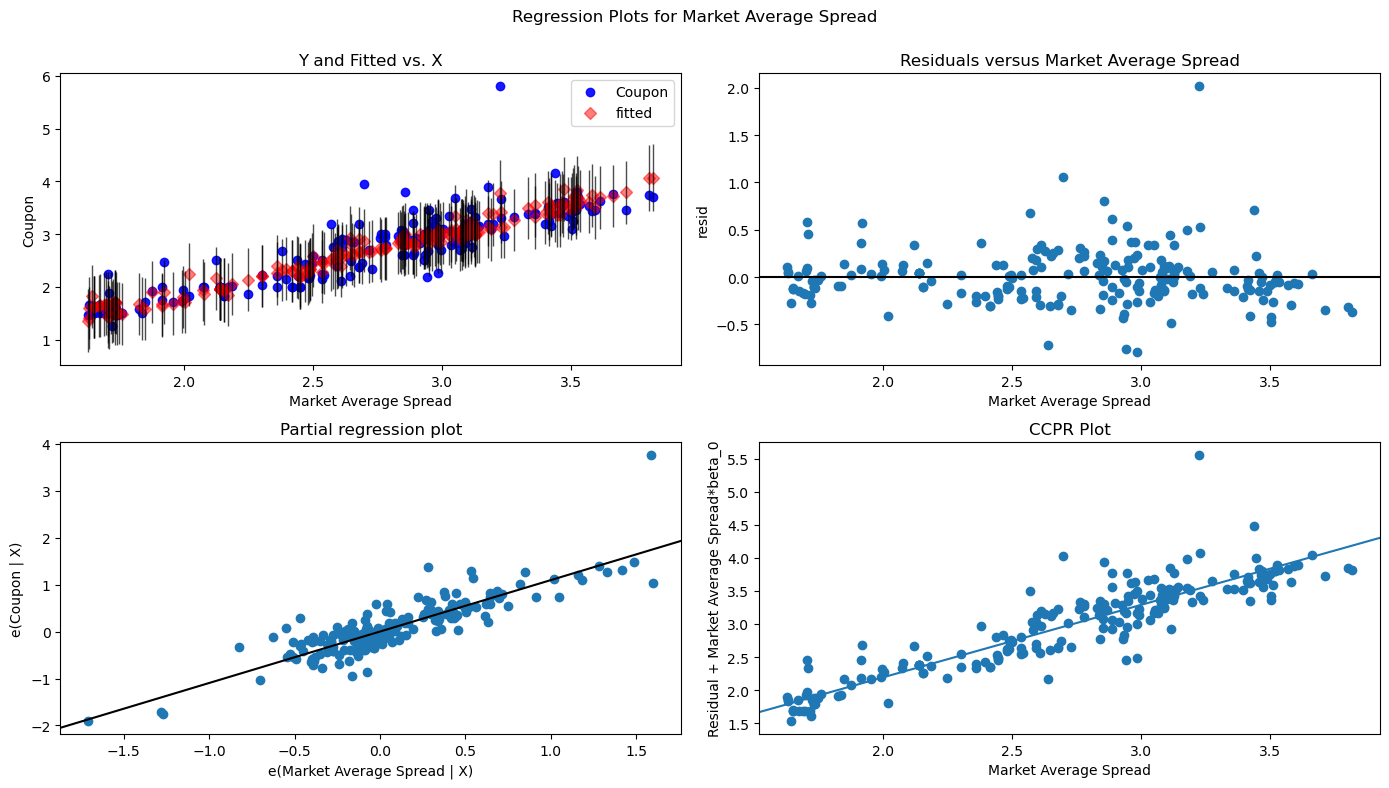

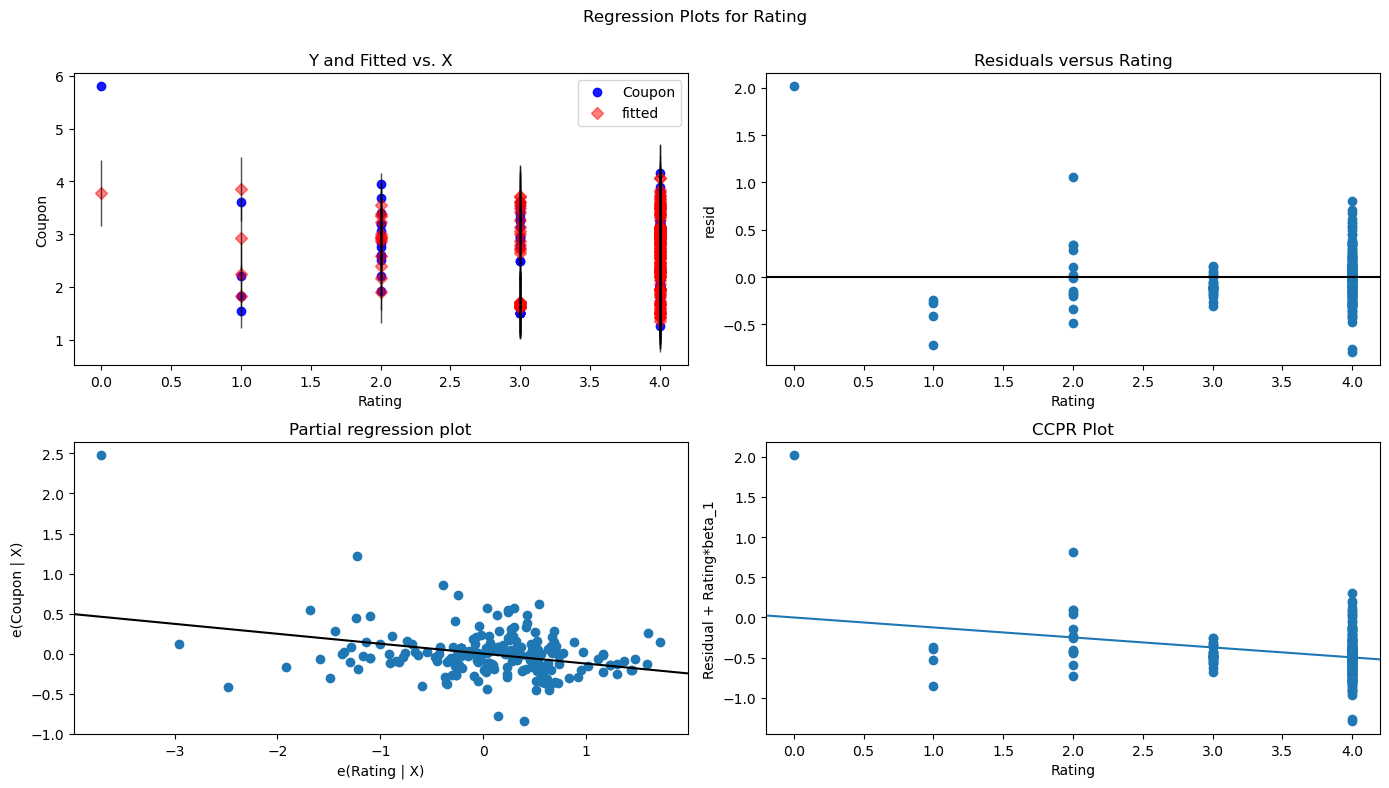

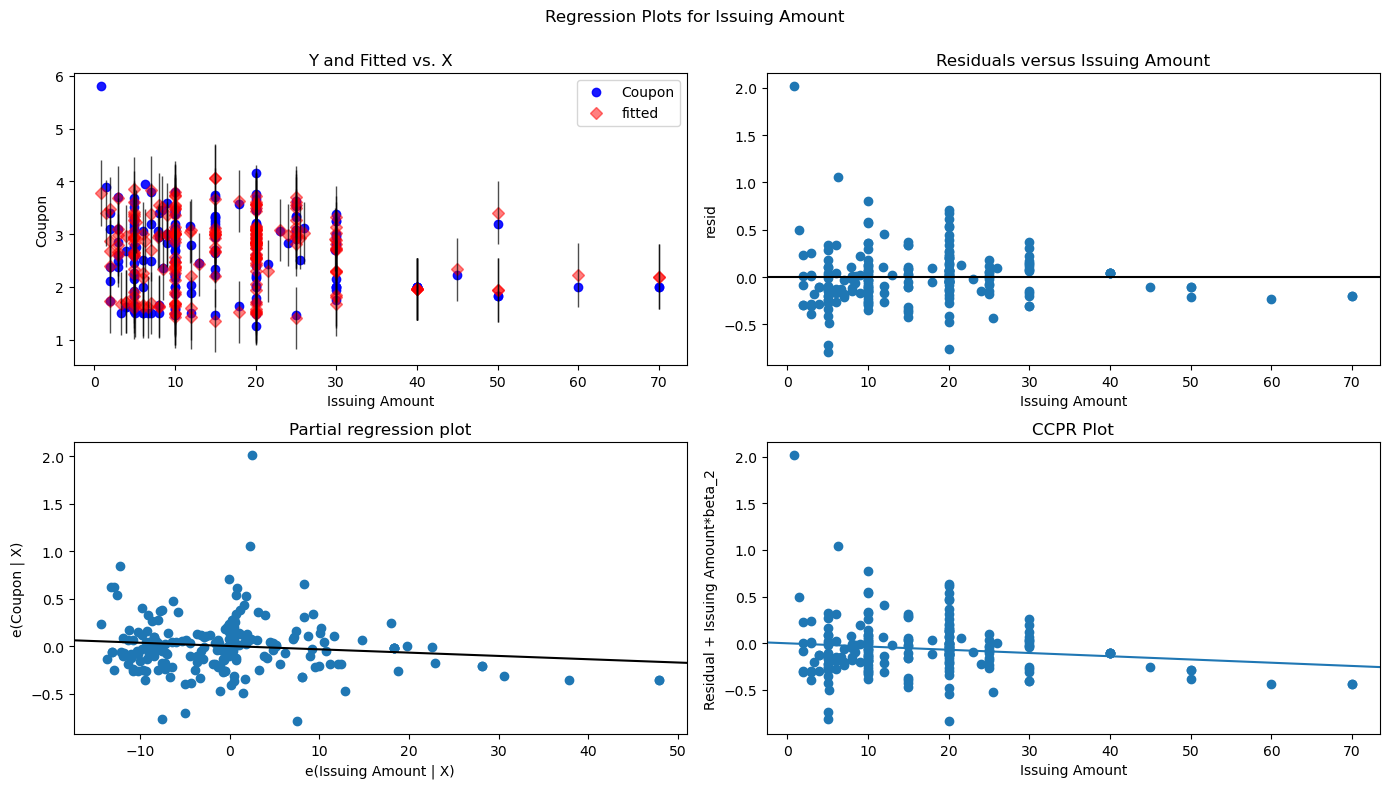

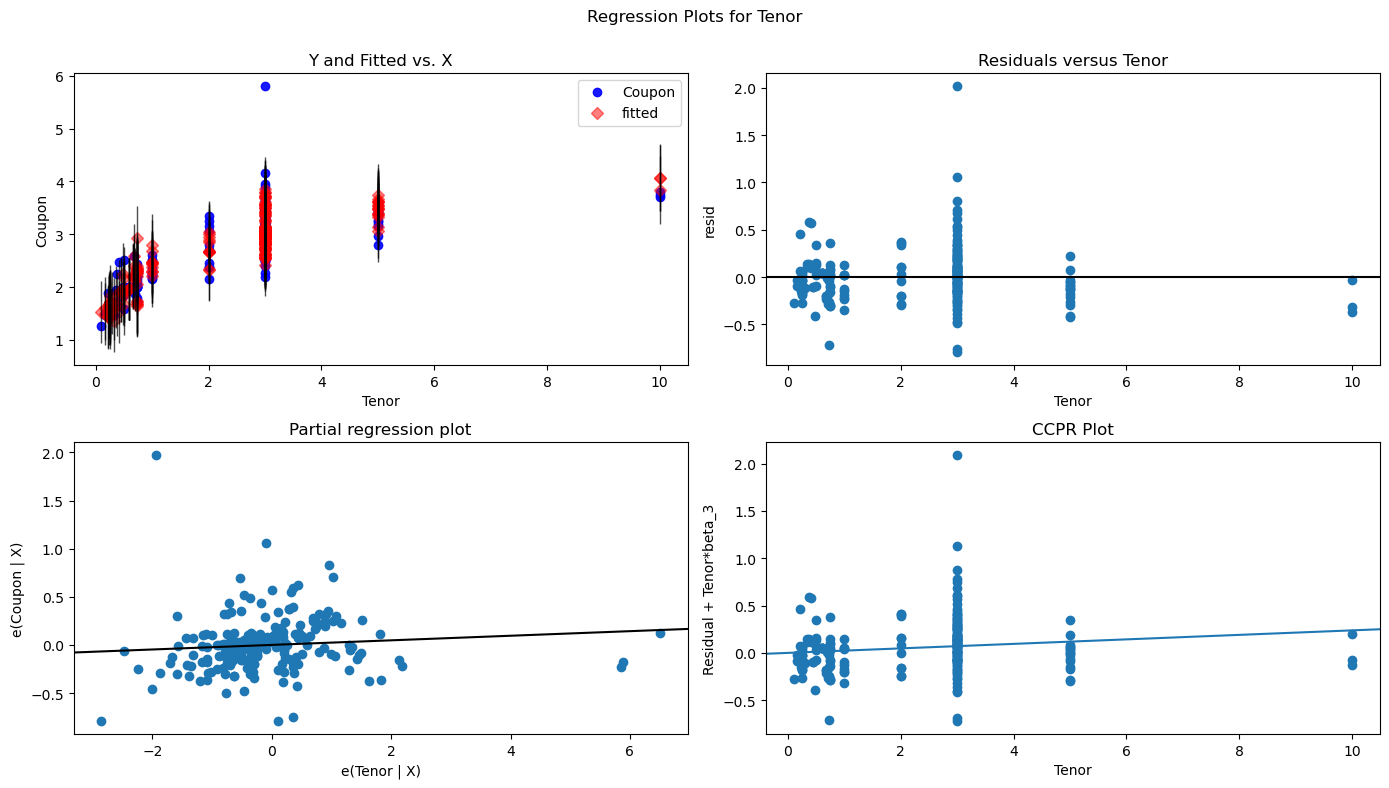

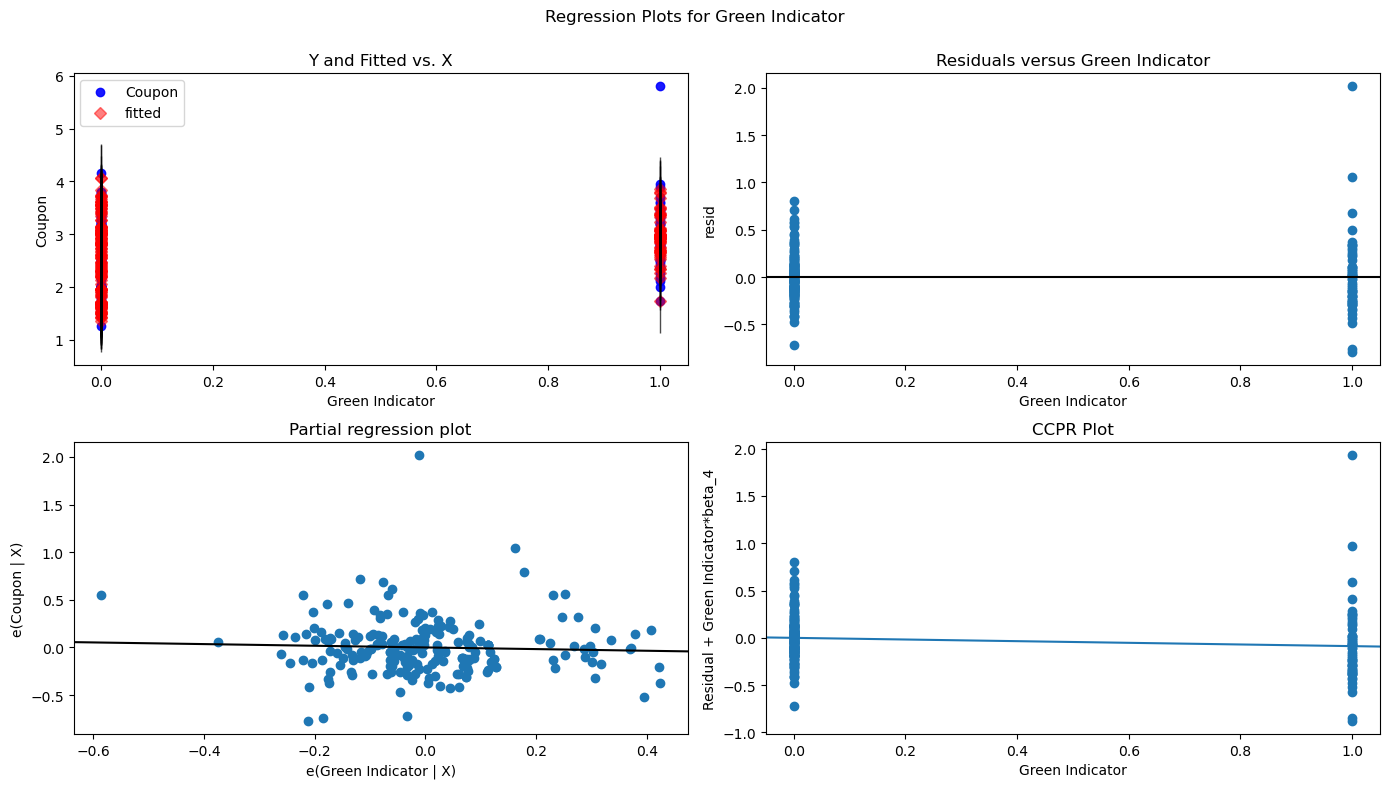

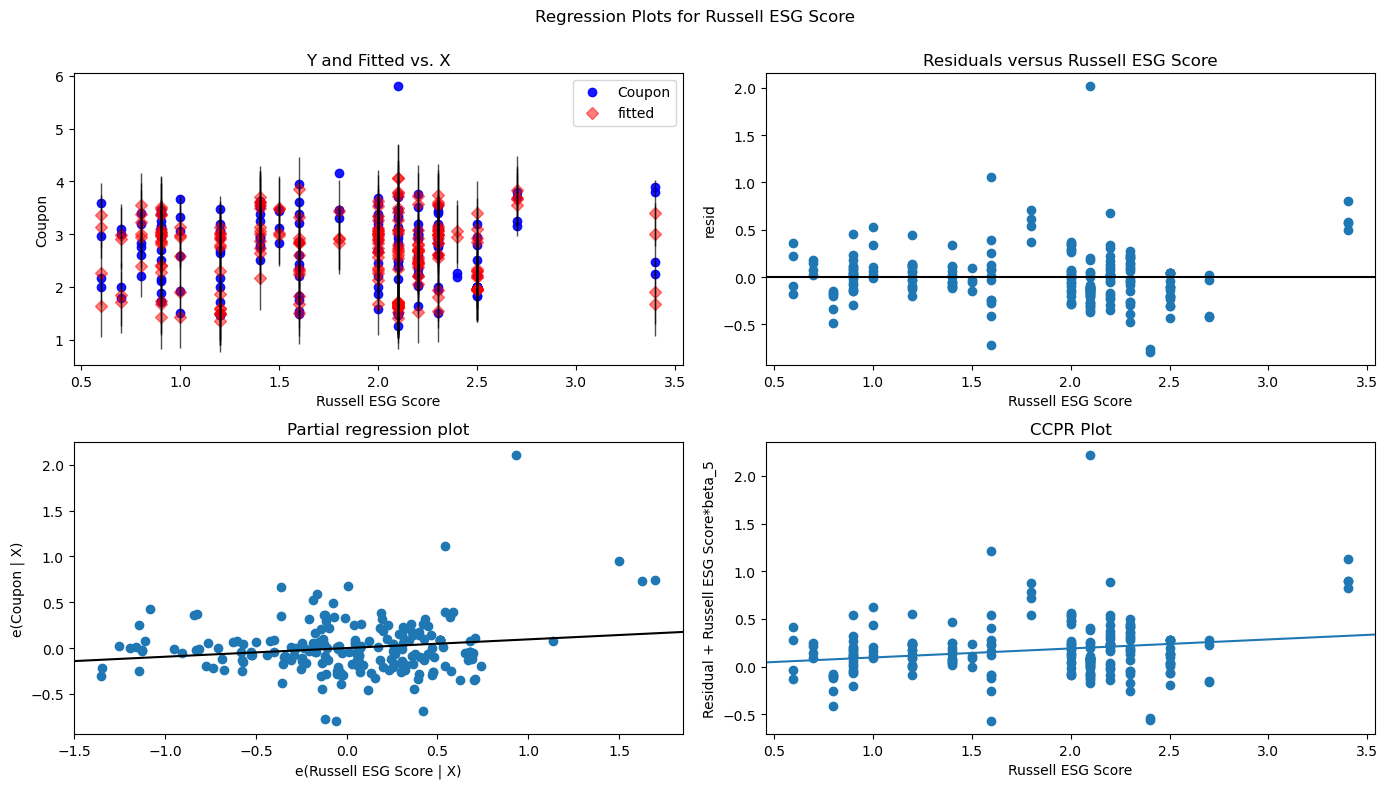

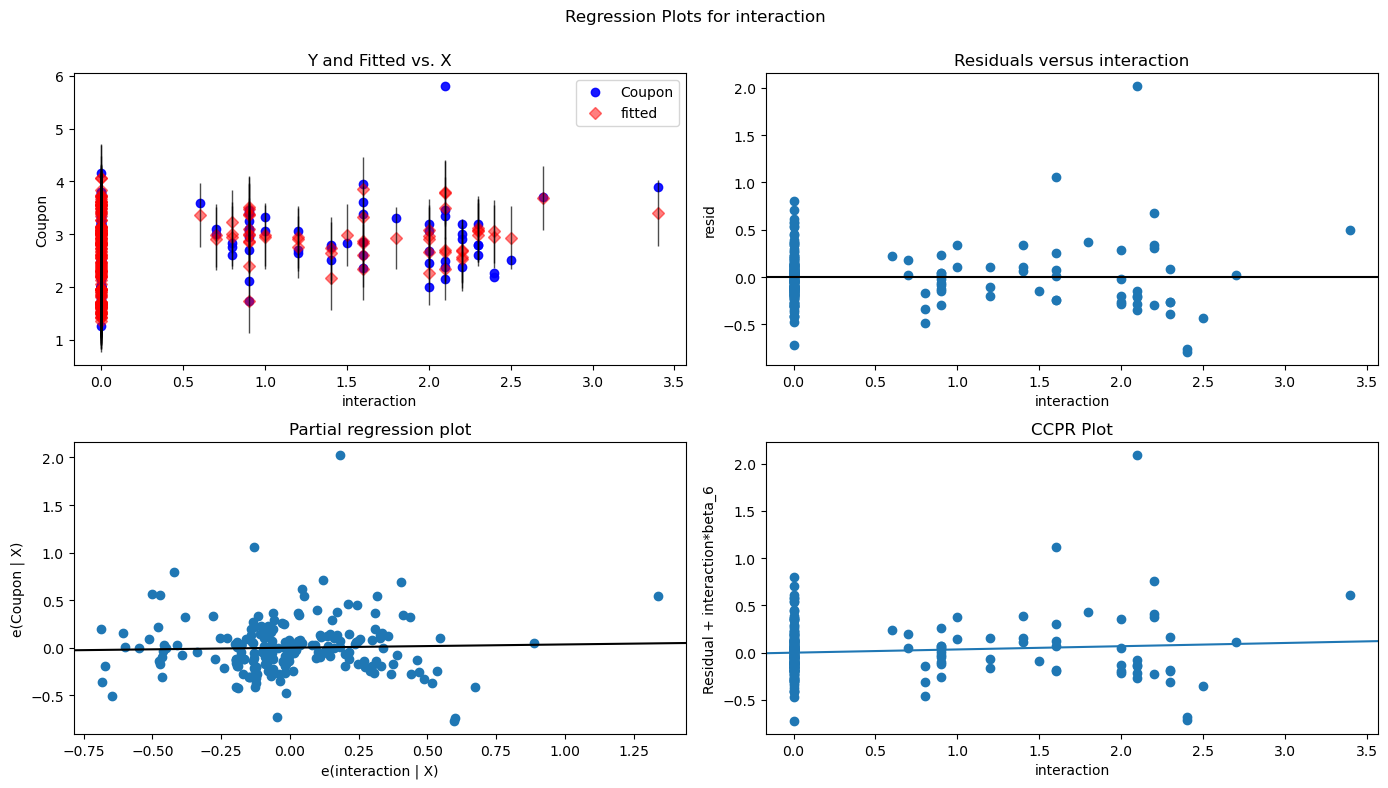

In [7]:
## Show the regression in charts
for x in range(len(factors1)):
    fig = plt.figure(figsize=(14, 8))
    fig = sm.graphics.plot_regress_exog(model1,
                                    factors1[x],
                                    fig=fig)

In [8]:
## Anova test
pingouin.anova(data = data_1, dv = "Coupon", between = "Russell ESG Score")

,Source,ddof1,ddof2,F,p-unc,np2
0,Russell ESG Score,17,193,2.850154,0.000255,0.200671


<AxesSubplot:>

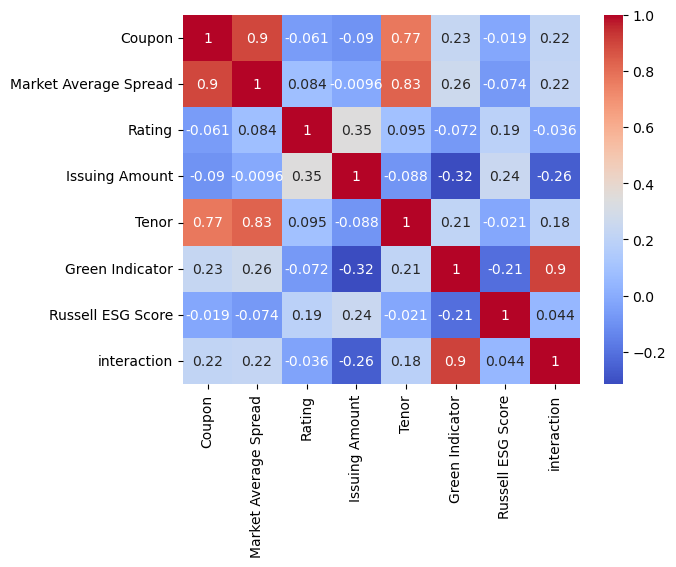

In [9]:
## Heatmaps
sns.heatmap(data_1.corr(), cmap='coolwarm', annot=True)

In [10]:
# Test 2
## Processing the data
factors2 = ["overnight", "Refinitiv ESG Score", "rating", "Amount Issued (USD)", "Year", "interaction"]

model2 = sm.OLS(data_2["Coupon"], data_2[factors2]).fit()
# Fit the model
prediction2 = model2.predict(data_2[factors2])
# Print the parameters of the fitted model
b1, b2, b3, b4, b5, b6 = model2.params
print("Parameters of the fitted model: \nb1: %f\nb2: %f\nb3: %f\nb4: %f\nb5: %f\nb6: %f" % (b1, b2, b3, b4, b5, b6))
model2.summary()

Parameters of the fitted model: 
b1: 1.507549
b2: 0.025737
b3: -0.016074
b4: 0.000000
b5: 0.001218
b6: -0.004568


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Coupon   R-squared (uncentered):                   0.802
Model:                            OLS   Adj. R-squared (uncentered):              0.799
Method:                 Least Squares   F-statistic:                              215.8
Date:                Sun, 30 Oct 2022   Prob (F-statistic):                   4.19e-109
Time:                        15:59:36   Log-Likelihood:                         -511.05
No. Observations:                 325   AIC:                                      1034.
Df Residuals:                     319   BIC:                                      1057.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
overnight               1.5075      0.122     12.405      0.000       1.268       1.747
Refinitiv ESG Score     0.0257      0.003      7.571      0.000       0.019       0.032
rating                 -0.0161      0.028     -0.581      0.562      -0.071       0.038
Amount Issued (USD)  4.976e-10   2.31e-10      2.154      0.032     4.3e-11    9.52e-10
Year                    0.0012      0.001      0.993      0.322      -0.001       0.004
interaction            -0.0046      0.009     -0.507      0.613      -0.022       0.013
==============================================================================
Omnibus:                       20.744   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.847
Skew:                           0.628   Prob(JB):                     1.09e-05
Kurtosis:                       3.328   Cond. No.                     1.32e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.32e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
## Obtaining the prediction and residual values
result2 = pd.concat([prediction2, model2.resid], axis =1)
result2 = result2.rename(columns = {0:'prediction', 1:'residual'})

In [12]:
## Print the regression results
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(result2)

     prediction  residual
0         3.324     1.051
1         0.891     0.693
2         6.387    -1.262
3         3.415     1.335
4         6.529    -1.154
5         6.529    -1.154
6         6.404    -0.904
7         6.404    -0.904
8         2.320     2.430
9         3.197     0.303
10        2.326     0.799
11        3.434     0.279
12        2.492     2.383
13        3.165    -0.040
14        2.830     0.045
15        3.115     1.385
16        5.548     0.705
17        5.548     0.705
18        3.165    -0.040
19        2.006     3.994
20        2.057     1.193
21        4.410     0.715
22        4.468     0.907
23        5.194    -0.244
24        1.688     2.437
25        2.531     1.219
26        2.700     2.050
27        2.302     1.765
28        4.346     3.248
29        2.218     1.272
30        1.937     0.688
31        2.242     1.883
32        3.893     0.857
33        6.239    -0.139
34        6.039    -1.889
35        5.896    -0.496
36        5.993    -0.393
37        2.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


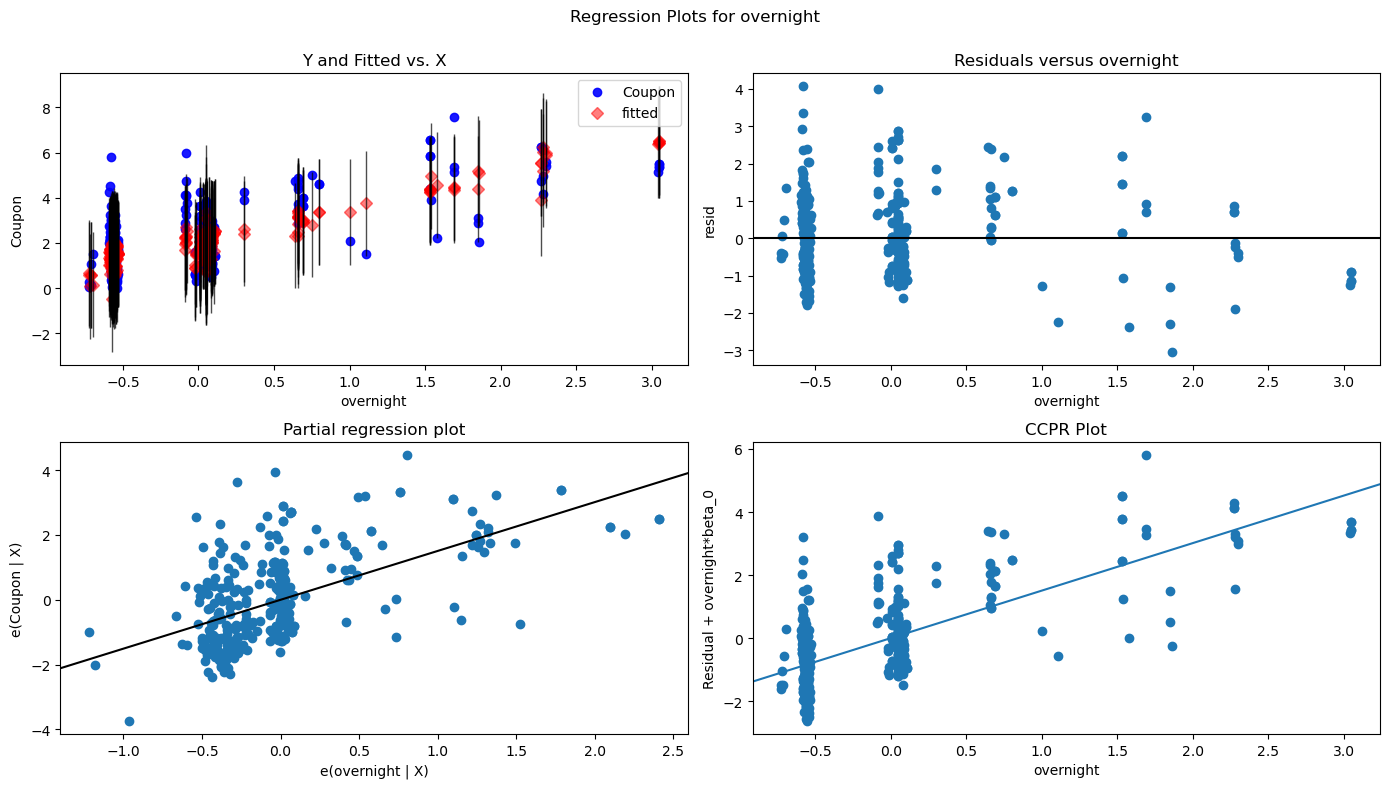

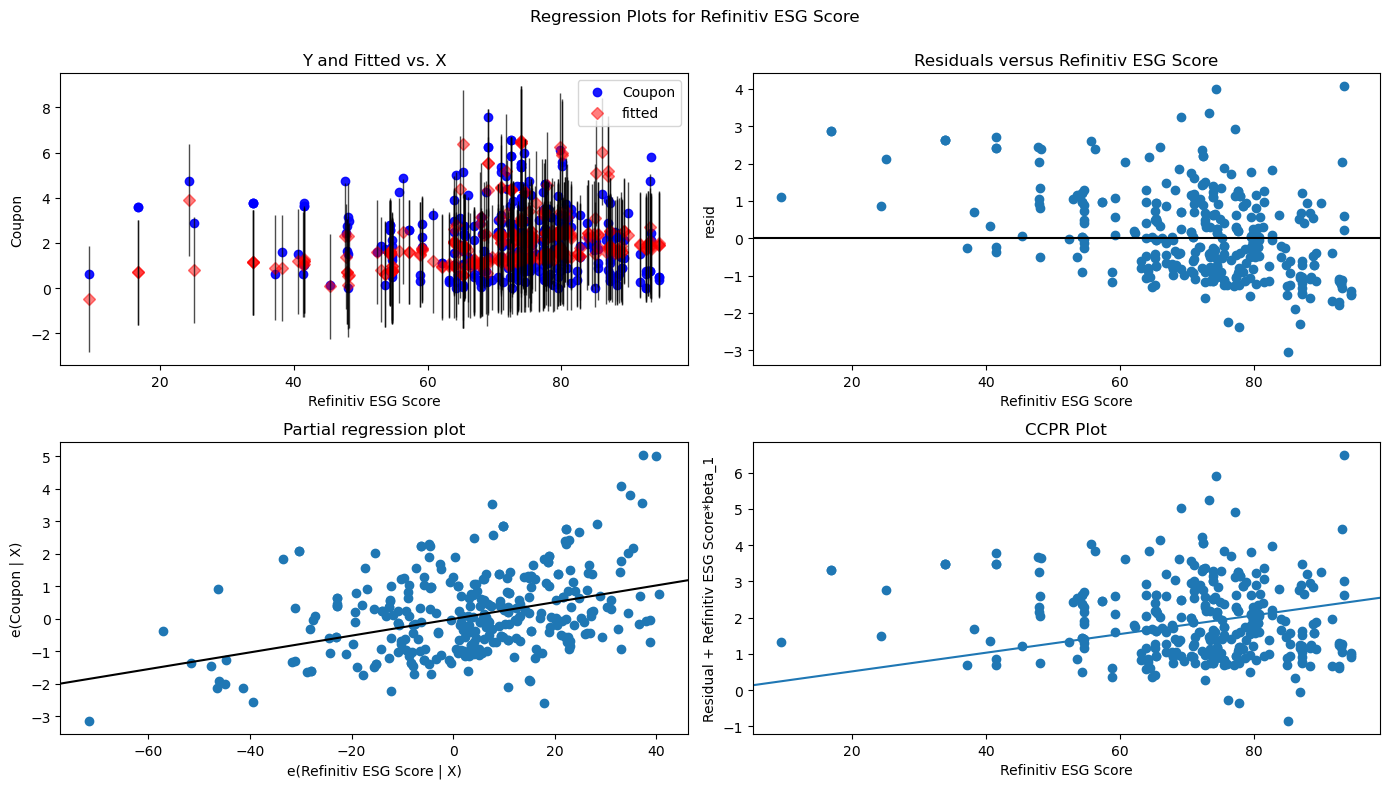

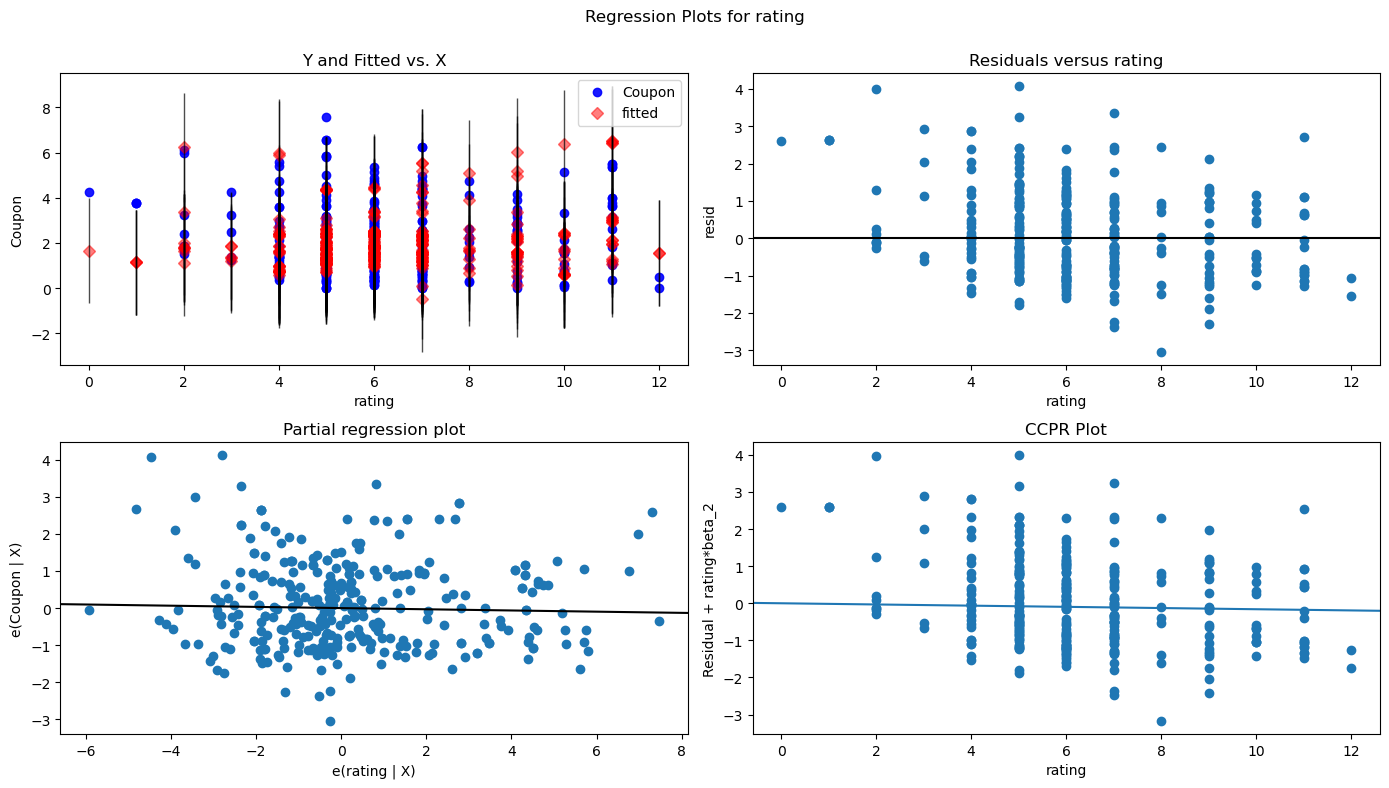

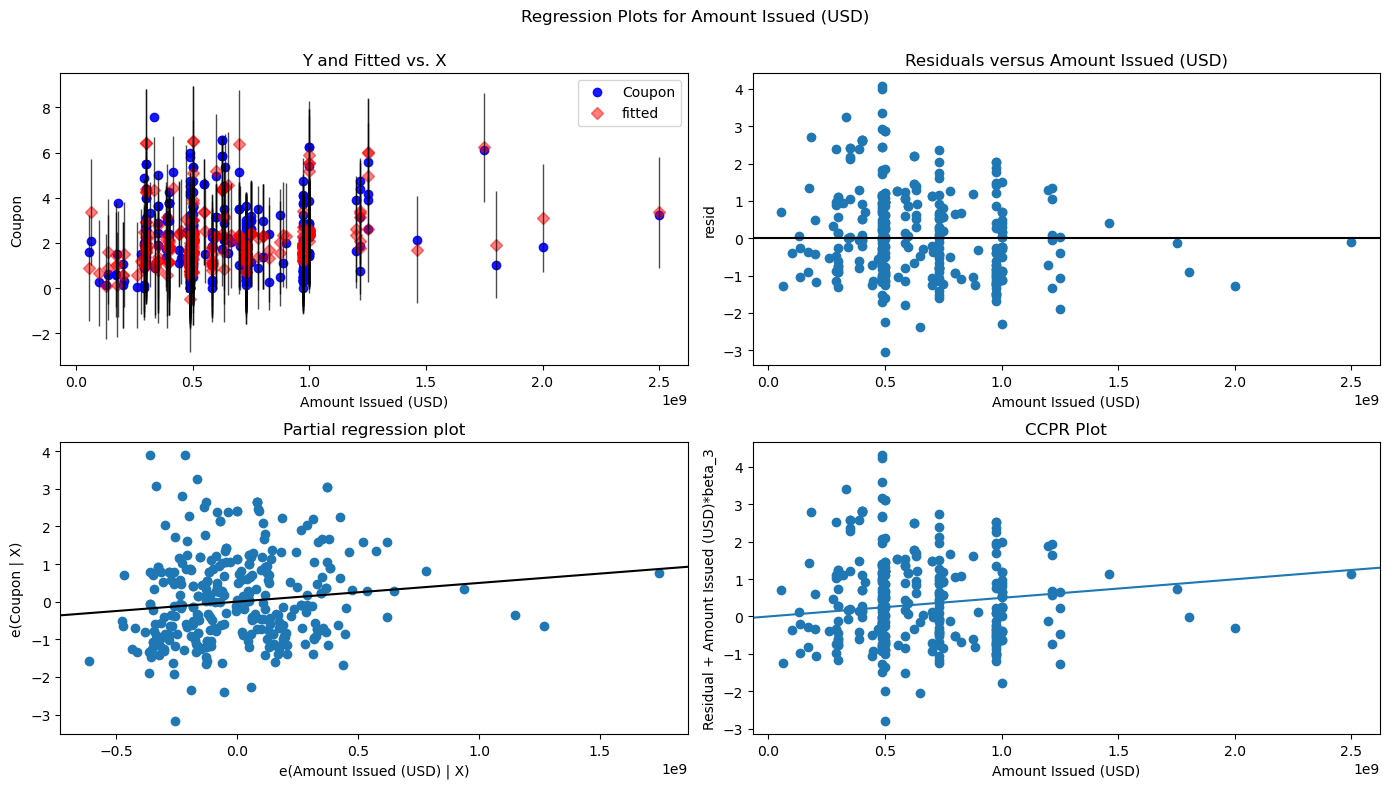

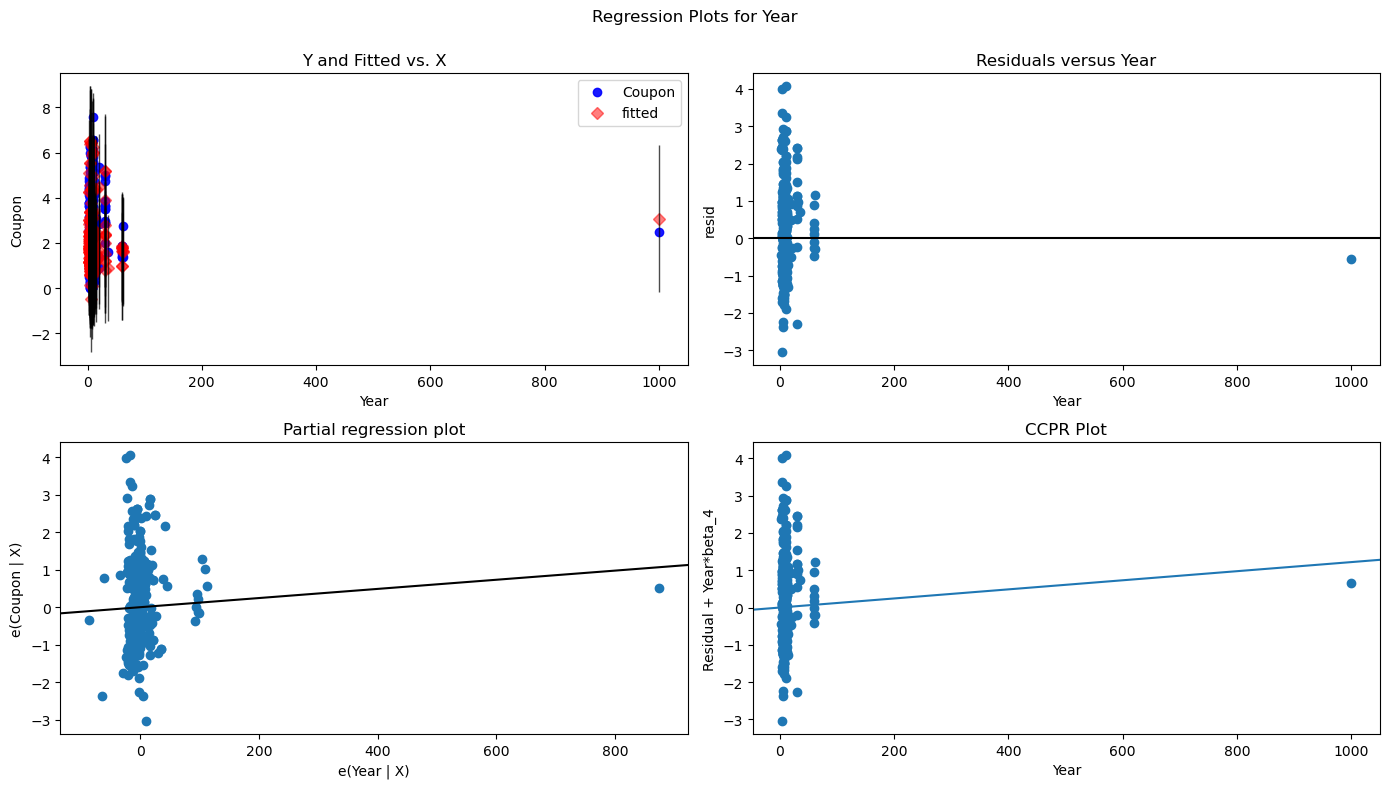

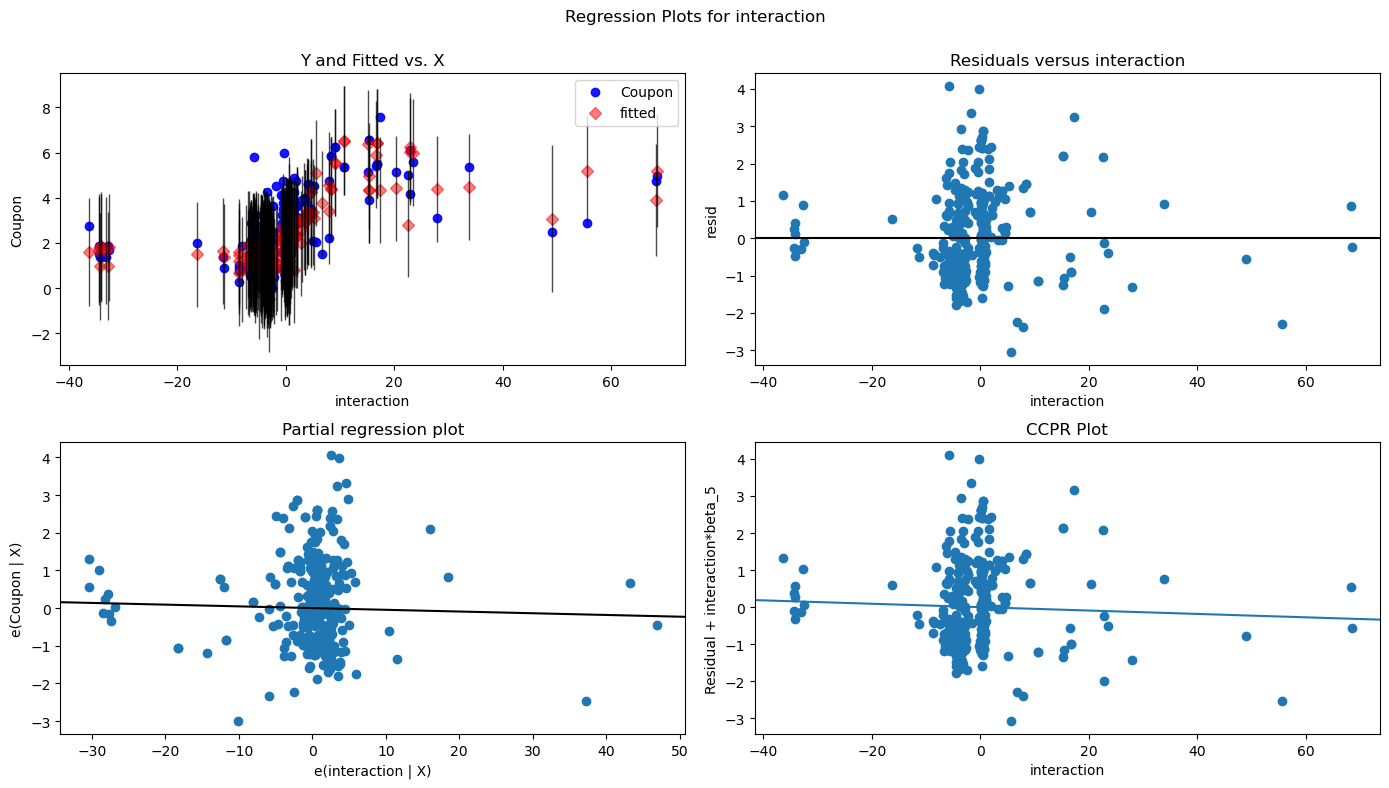

In [13]:
## Show the regression in charts
for x in range(len(factors2)):
    fig = plt.figure(figsize=(14, 8))
    fig = sm.graphics.plot_regress_exog(model2,
                                    factors2[x],
                                    fig=fig)

In [14]:
## Anova test
pingouin.anova(data = data_2, dv = "Coupon", between = "Refinitiv ESG Score")

,Source,ddof1,ddof2,F,p-unc,np2
0,Refinitiv ESG Score,155,169,1.862813,0.000041,0.630792


<AxesSubplot:>

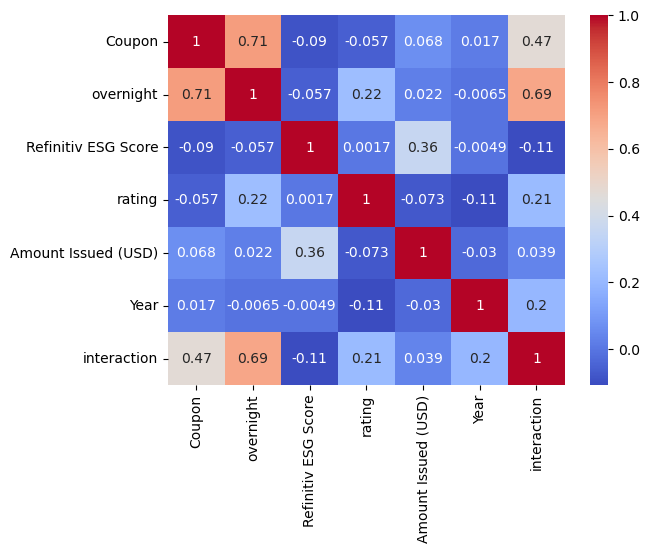

In [15]:
## Heatmap
sns.heatmap(data_2.corr(), cmap='coolwarm', annot=True)

In [16]:
# Test 3_1
## Processing the data
factors3_1 = ["Bloomberg ESG Score", "Credit Rating", "Risk free rate with same tenor", "Tenor", "Option"]

model3_1 = sm.OLS(data_3_1["Coupon"], data_3_1[factors3_1]).fit()
# Fit the model
prediction3_1 = model3_1.predict(data_3_1[factors3_1])
# Print the parameters of the fitted model
b1, b2, b3, b4, b5 = model3_1.params
print("Parameters of the fitted model: \nb1: %f\nb2: %f\nb3: %f\nb4: %f\nb5: %f" % (b1, b2, b3, b4, b5))
model3_1.summary()

Parameters of the fitted model: 
b1: 0.028814
b2: -0.057580
b3: 1.070635
b4: 0.032890
b5: -0.324753


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Coupon   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              131.5
Date:                Sun, 30 Oct 2022   Prob (F-statistic):                    1.17e-21
Time:                        15:59:39   Log-Likelihood:                         -47.104
No. Observations:                  40   AIC:                                      104.2
Df Residuals:                      35   BIC:                                      112.7
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Bloomberg ESG Score                0.0288      0.008      3.583      0.001       0.012       0.045
Credit Rating                     -0.0576      0.040     -1.457      0.154      -0.138       0.023
Risk free rate with same tenor     1.0706      0.151      7.107      0.000       0.765       1.376
Tenor                              0.0329      0.022      1.497      0.143      -0.012       0.077
Option                            -0.3248      0.411     -0.790      0.435      -1.159       0.510
==============================================================================
Omnibus:                        5.350   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                4.587
Skew:                           0.828   Prob(JB):                        0.101
Kurtosis:                       3.112   Cond. No.                         167.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
## Obtaining the prediction and residual values
result3_1 = pd.concat([prediction3_1, model3_1.resid], axis =1)
result3_1 = result3_1.rename(columns = {0:'prediction', 1:'residual'})

In [18]:
## Print the regression results
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(result3_1)

    prediction  residual
0        5.657    -0.707
1        5.301     0.799
2        4.766     1.770
3        4.361    -0.461
4        4.845    -0.470
5        5.141     0.734
6        4.861    -0.361
7        4.457    -0.207
8        4.483     0.142
9        4.926     1.199
10       2.334     0.216
11       4.372    -0.497
12       2.832     0.048
13       2.371    -0.571
14       3.283    -0.908
15       3.186    -0.886
16       4.613    -1.213
17       3.097    -0.826
18       4.164    -0.314
19       4.026    -0.401
20       2.732    -0.482
21       2.736     1.014
22       2.599     0.276
23       1.595     0.405
24       3.360    -0.860
25       3.127    -0.877
26       2.268     1.982
27       1.690    -0.815
28       4.278     0.472
29       1.580     0.045
30       2.117     1.883
31       2.592    -0.092
32       2.755     0.370
33       1.634    -0.009
34       0.325     1.128
35       0.273    -0.023
36       1.666     0.334
37       1.059     0.066
38       0.669    -0.044


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


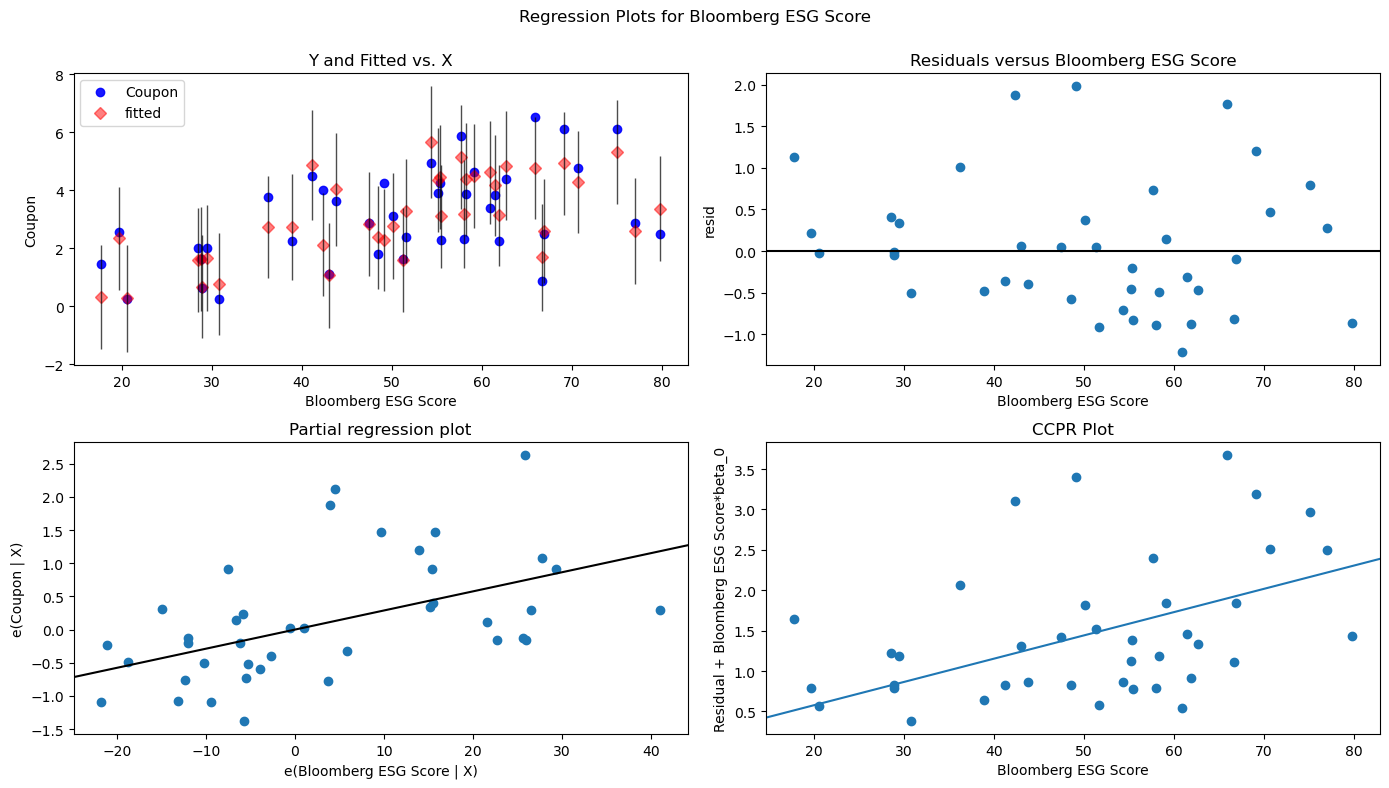

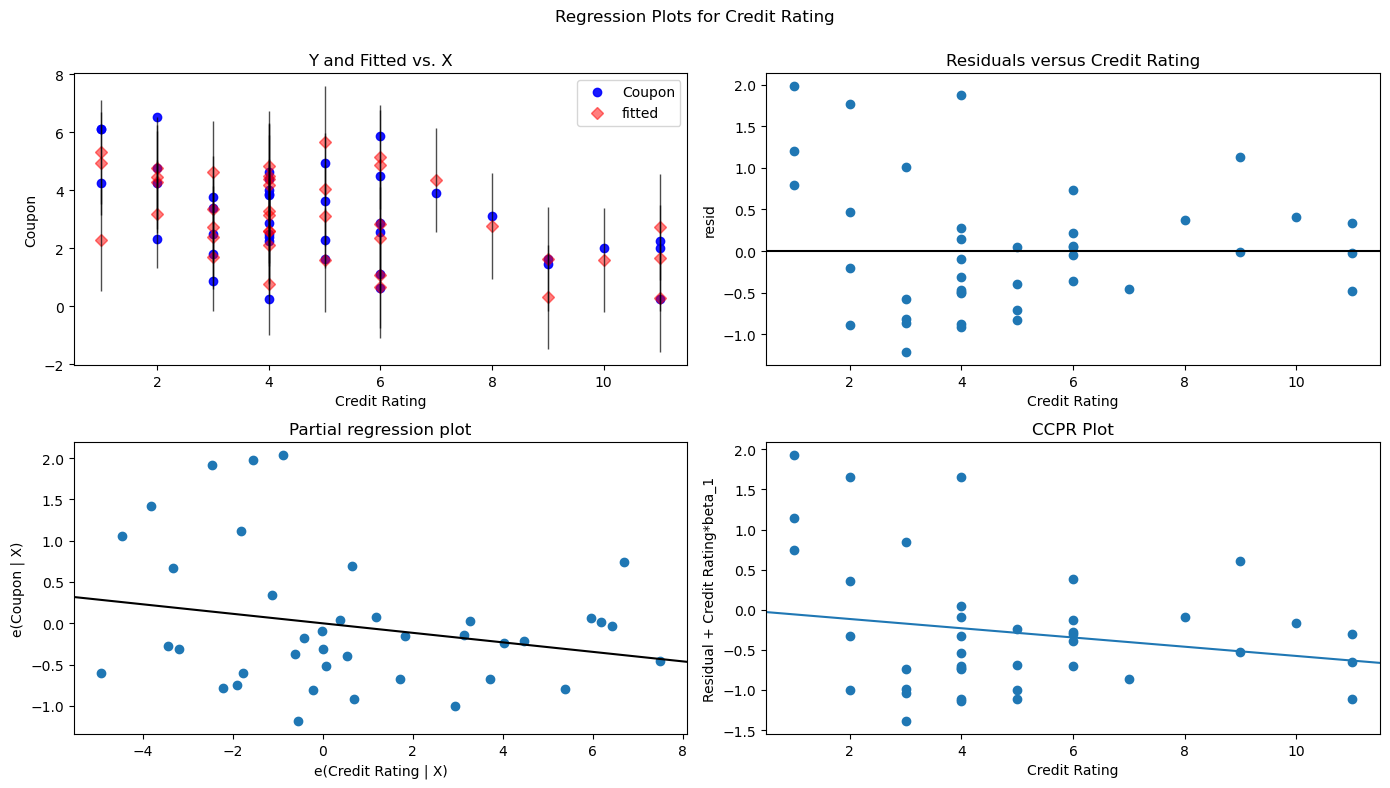

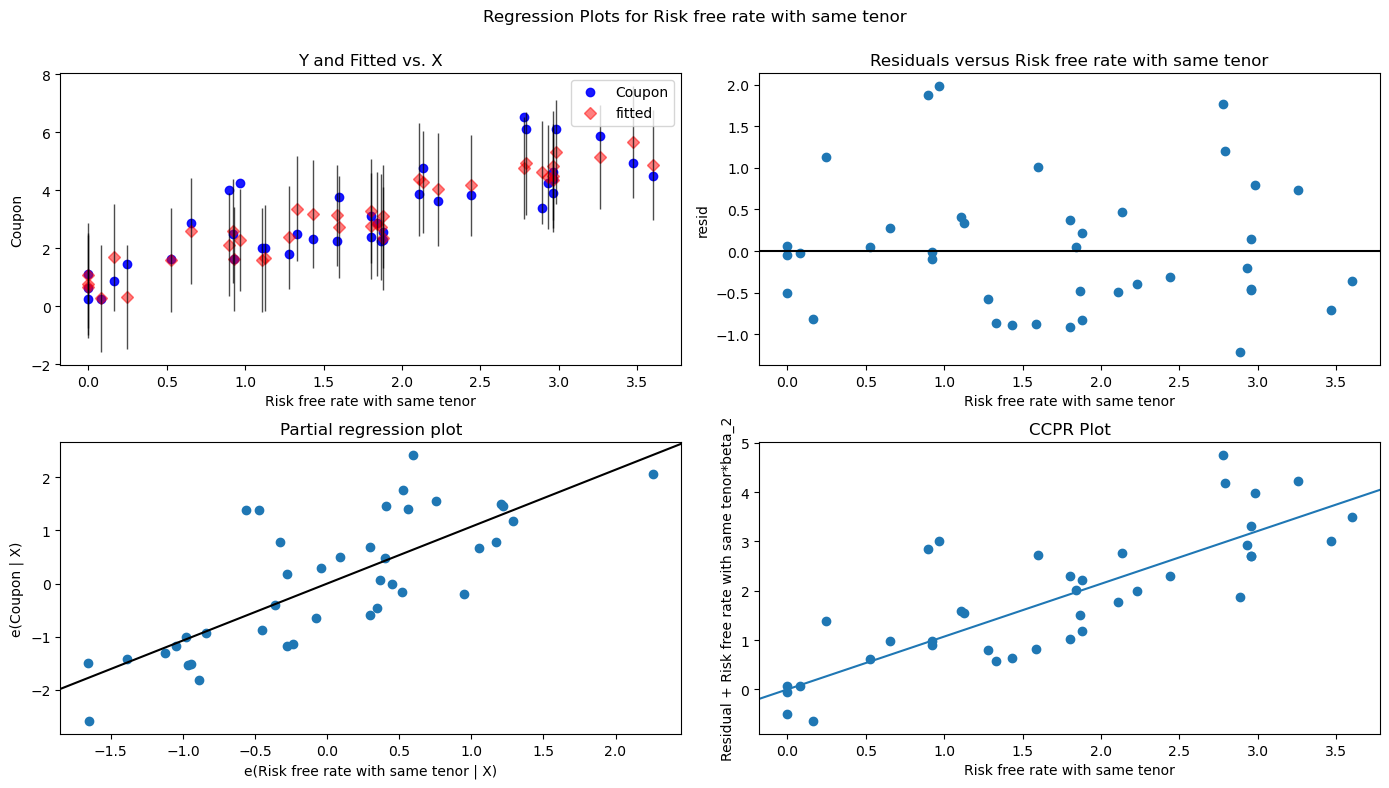

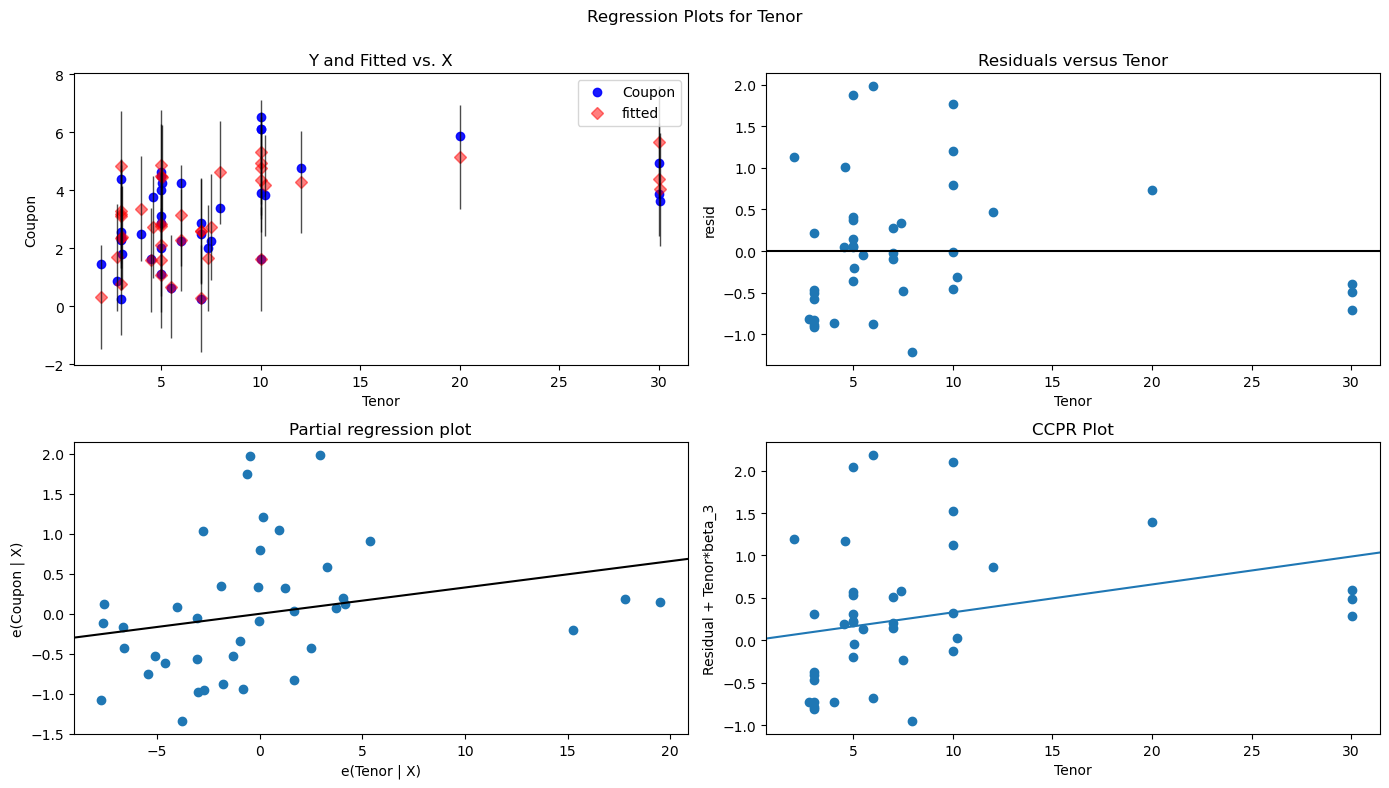

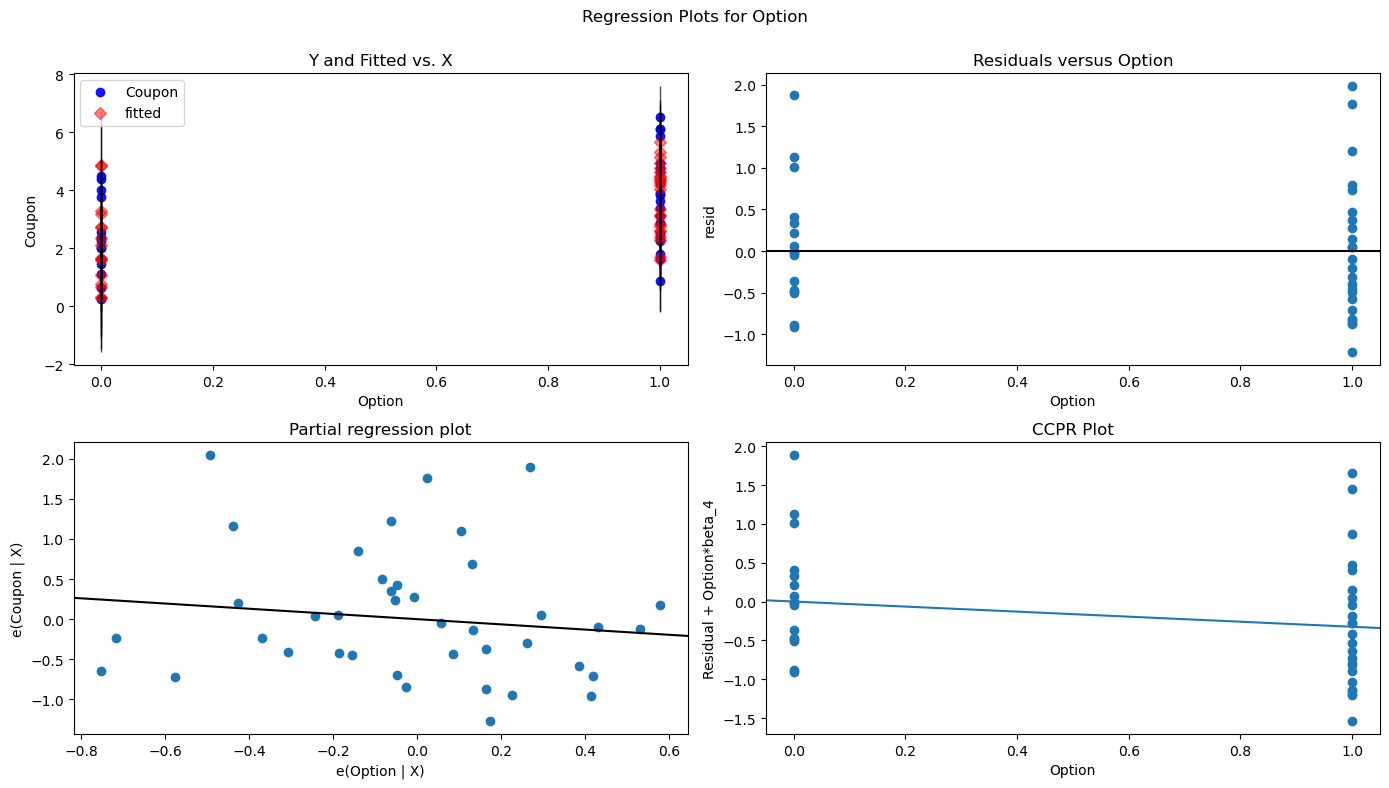

In [19]:
## Show the regression in charts
for x in range(len(factors3_1)):
    fig = plt.figure(figsize=(14, 8))
    fig = sm.graphics.plot_regress_exog(model3_1,
                                    factors3_1[x],
                                    fig=fig)

In [20]:
## Anova test
pingouin.anova(data = data_3_1, dv = "Coupon", between = "Bloomberg ESG Score")

/opt/anaconda3/lib/python3.9/site-packages/pingouin/parametric.py:1000: RuntimeWarning: invalid value encountered in double_scalars
  mserror = sserror / ddof2


,Source,ddof1,ddof2,np2
0,Bloomberg ESG Score,39,0,1.0


<AxesSubplot:>

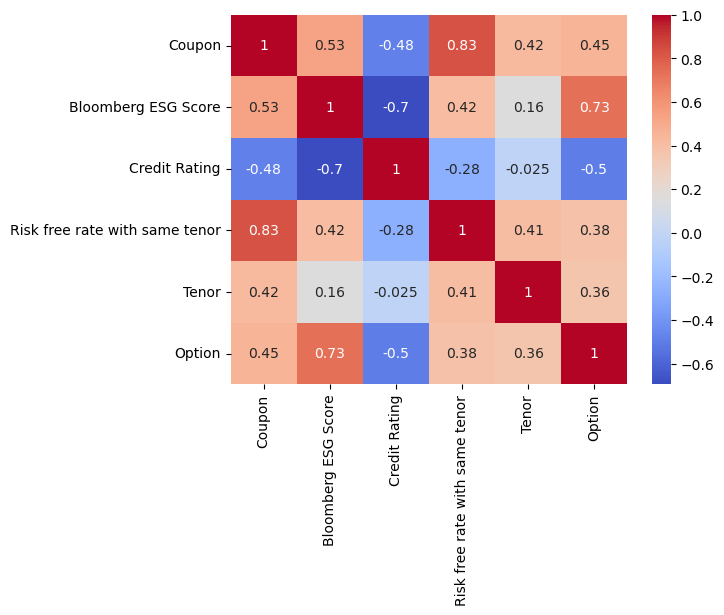

In [21]:
## Heatmaps
sns.heatmap(data_3_1.corr(), cmap='coolwarm', annot=True)

In [22]:
# Test 3_2
## Processing the data
factors3_2 = ["Market Average Spread", "Tenor", "Credit rating", "Issuer Type", "Russeel ESG Score"]

model3_2 = sm.OLS(data_3_2["coupon"], data_3_2[factors3_2]).fit()
# Fit the model
prediction3_2 = model3_2.predict(data_3_2[factors3_2])
# Print the parameters of the fitted model
b1, b2, b3, b4, b5 = model3_2.params
print("Parameters of the fitted model: \nb1: %f\nb2: %f\nb3: %f\nb4: %f\nb5: %f" % (b1, b2, b3, b4, b5))
model3_2.summary()

Parameters of the fitted model: 
b1: 1.836354
b2: 0.037878
b3: -0.252250
b4: -0.241804
b5: 0.052598


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 coupon   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              1184.
Date:                Sun, 30 Oct 2022   Prob (F-statistic):                    2.88e-52
Time:                        15:59:41   Log-Likelihood:                         -8.5486
No. Observations:                  57   AIC:                                      27.10
Df Residuals:                      52   BIC:                                      37.31
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Market Average Spread     1.8364      0.110     16.651      0.000       1.615       2.058
Tenor                     0.0379      0.051      0.741      0.462      -0.065       0.140
Credit rating            -0.2523      0.043     -5.860      0.000      -0.339      -0.166
Issuer Type              -0.2418      0.042     -5.740      0.000      -0.326      -0.157
Russeel ESG Score         0.0526      0.061      0.863      0.392      -0.070       0.175
==============================================================================
Omnibus:                        4.368   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                3.481
Skew:                           0.427   Prob(JB):                        0.175
Kurtosis:                       3.858   Cond. No.                         20.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
## Obtaining the prediction and residual values
result3_2 = pd.concat([prediction3_2, model3_2.resid], axis =1)
result3_2 = result3_2.rename(columns = {0:'prediction', 1:'residual'})

In [24]:
## Print the regression results
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(result3_2)

    prediction  residual
0        3.001     0.329
1        2.986     0.214
2        1.770     0.230
3        1.444     0.296
4        2.614    -0.114
5        2.190    -0.080
6        1.925     0.425
7        2.518     0.332
8        2.495     0.255
9        2.678     0.122
10       2.964    -0.164
11       2.643    -0.043
12       3.627    -0.527
13       3.060     0.190
14       2.640     0.060
15       3.295     0.105
16       2.934     0.116
17       2.899     0.051
18       3.199     0.201
19       3.494    -0.044
20       2.941     0.119
21       3.421    -0.071
22       3.538    -0.088
23       2.115     0.025
24       2.459    -0.089
25       3.013    -0.413
26       2.985    -0.235
27       3.140    -0.310
28       2.884    -0.394
29       3.289    -0.089
30       2.601     0.049
31       3.029    -0.329
32       2.907     0.143
33       3.869     0.031
34       3.105    -0.005
35       4.892     0.908
36       2.908     0.092
37       3.046     0.044
38       3.425    -0.035


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


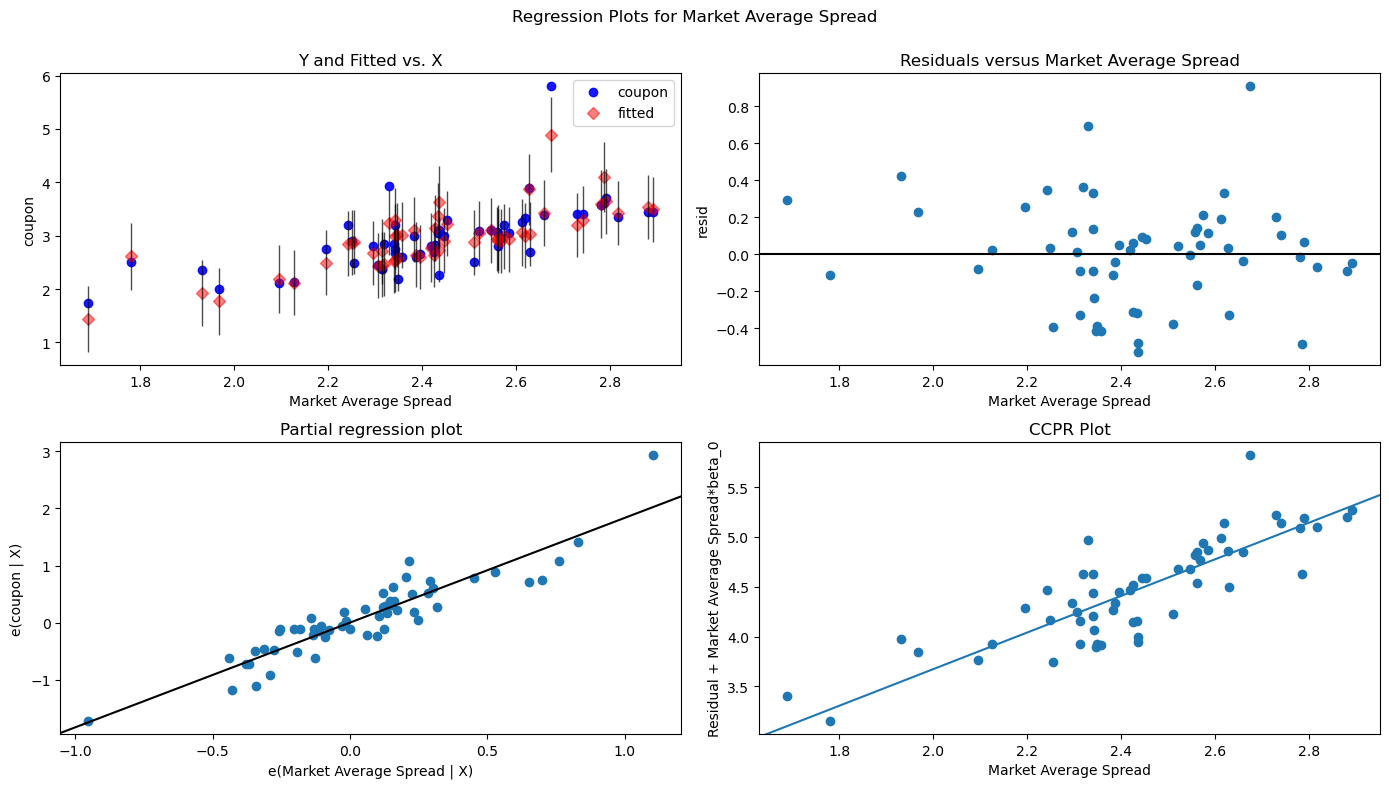

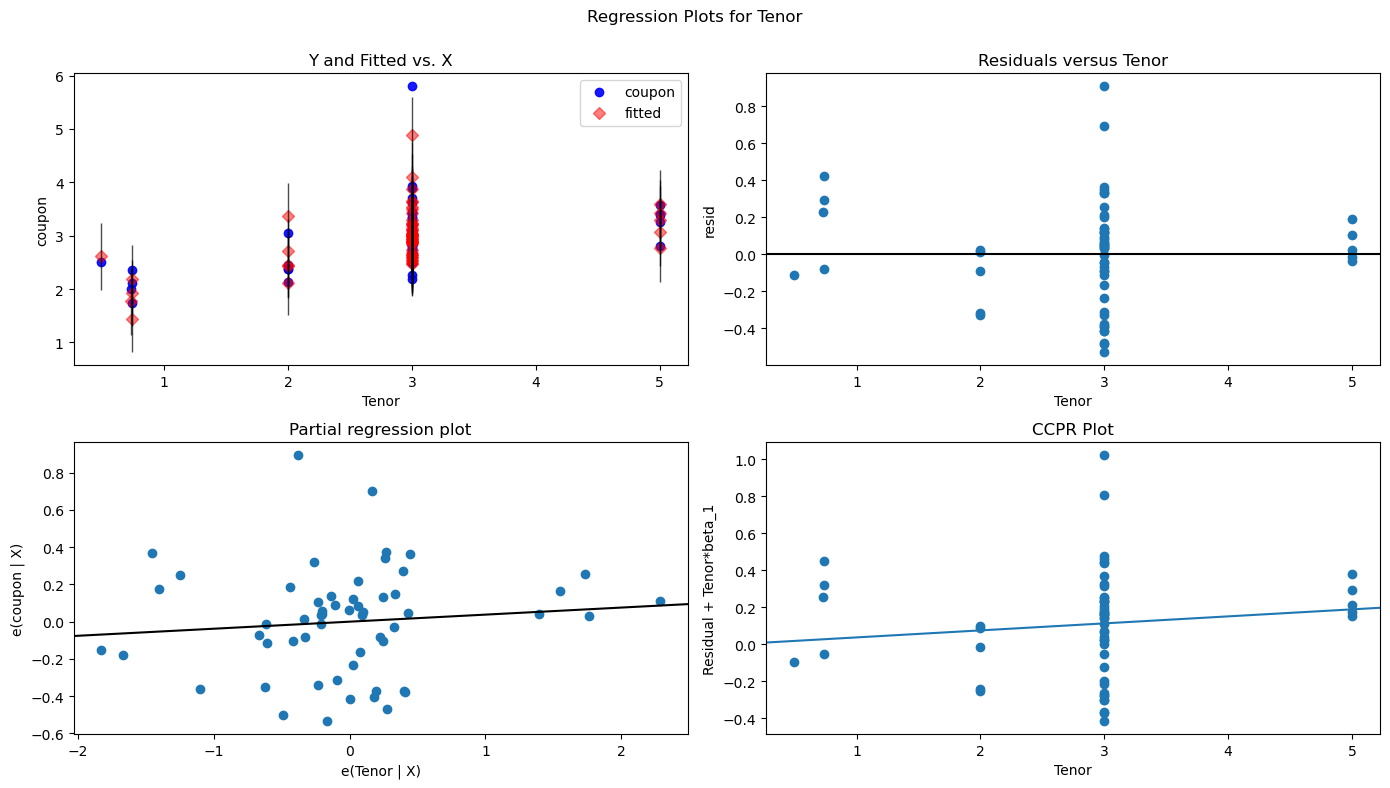

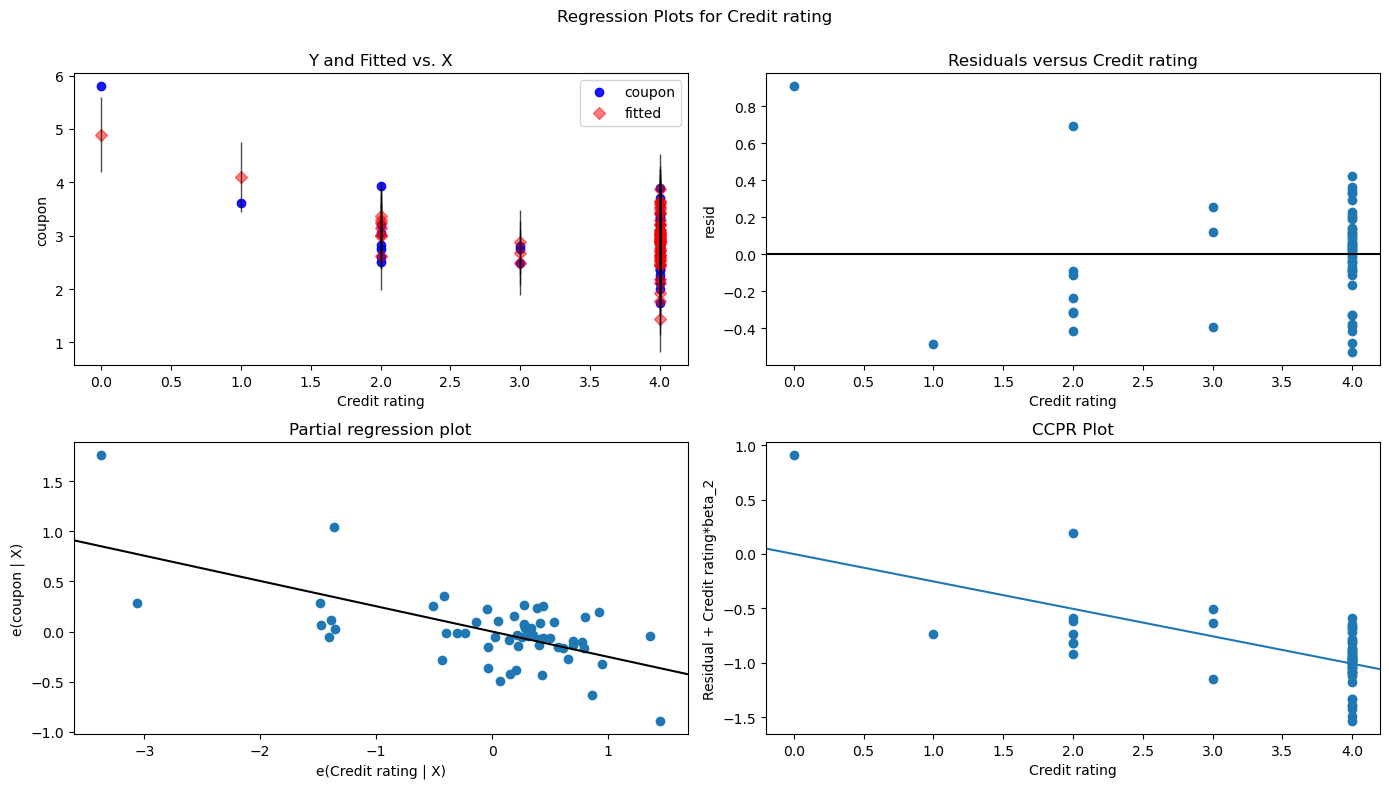

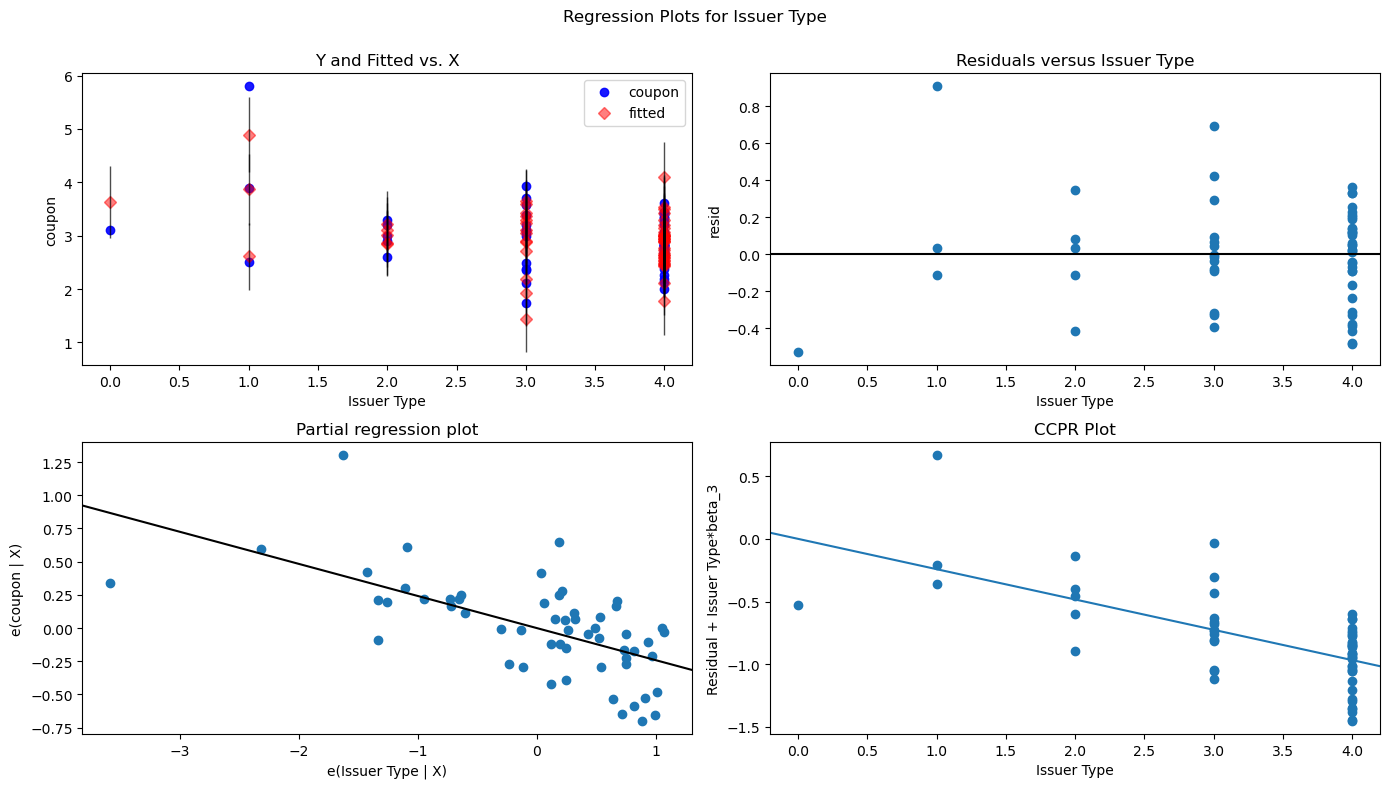

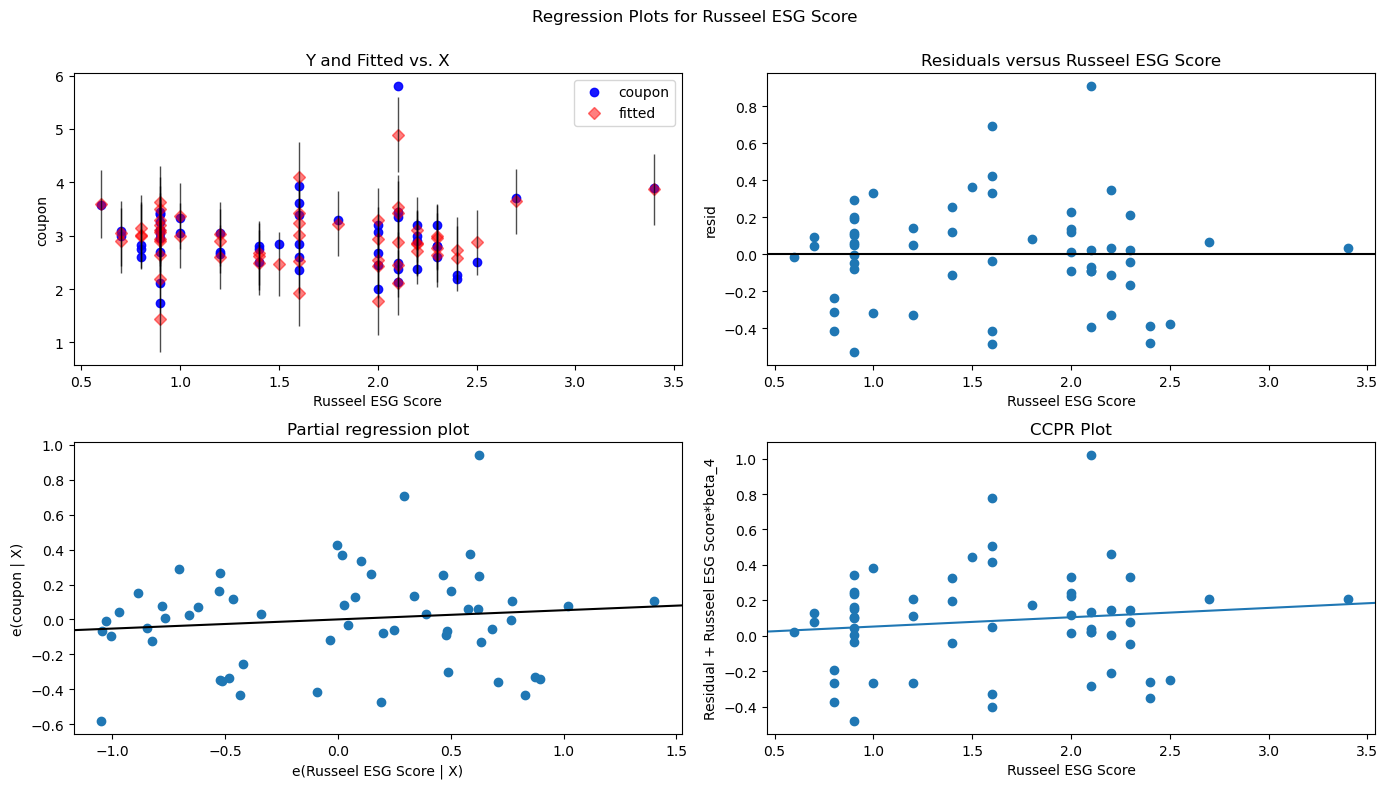

In [25]:
## Show the regression in charts
for x in range(len(factors3_2)):
    fig = plt.figure(figsize=(14, 8))
    fig = sm.graphics.plot_regress_exog(model3_2,
                                    factors3_2[x],
                                    fig=fig)

In [26]:
## Anova test
print(pingouin.anova(data = data_3_2, dv = "coupon", between = "Russeel ESG Score"))
print(pingouin.anova(data = data_3_2, dv = "coupon", between = "Issuer Type"))

              Source  ddof1  ddof2         F     p-unc       np2
0  Russeel ESG Score     17     39  0.733641  0.750581  0.242305
        Source  ddof1  ddof2         F     p-unc       np2
0  Issuer Type      4     52  3.218563  0.019578  0.198449


<AxesSubplot:>

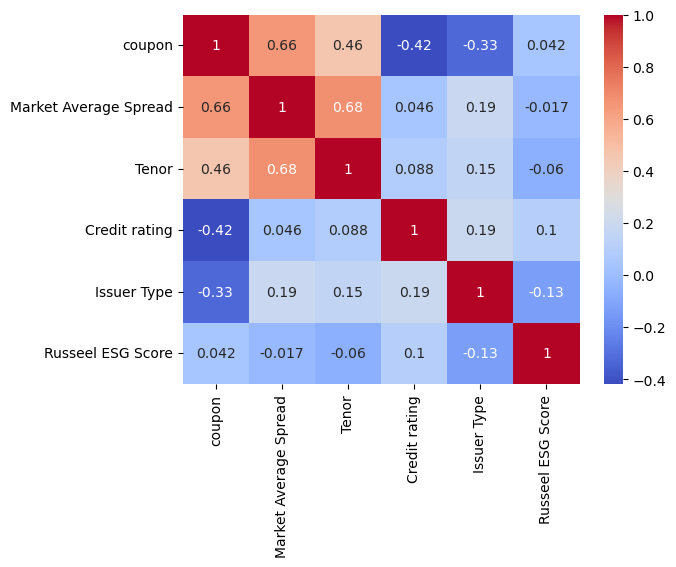

In [27]:
## Heatmaps
sns.heatmap(data_3_2.corr(), cmap='coolwarm', annot=True)